In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'be644eaf-6d1f-430d-8941-c63b2bca8e77',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
print(data)

{'status': {'timestamp': '2024-03-21T12:27:29.936Z', 'error_code': 0, 'error_message': None, 'elapsed': 36, 'credit_count': 1, 'notice': None, 'total_count': 9221}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10940, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [3]:
import pandas as pd

In [4]:
pd.set_option('display.max_columns', None)
df=pd.json_normalize(data['data'])
df['Timestamp'] = pd.to_datetime('now')

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10940,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.966032e+07,1.966032e+07,False,NaN,1,NaN,NaN,None,2024-03-21T12:27:00.000Z,67294.926796,5.605619e+10,-12.2301,0.706408,4.835652,-7.463801,28.650501,61.234112,54.429456,1.323040e+12,52.0260,1.413193e+12,None,2024-03-21T12:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-21 14:27:34.439867
1,1027,Ethereum,ETH,ethereum,8619,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.200743e+08,1.200743e+08,True,NaN,2,NaN,NaN,None,2024-03-21T12:26:00.000Z,3542.042306,3.067483e+10,-3.1746,0.360503,5.838798,-9.947312,20.212069,43.259223,53.656330,4.253083e+11,16.7195,4.253083e+11,None,2024-03-21T12:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-21 14:27:34.439867
2,825,Tether USDt,USDT,tether,79786,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.039040e+11,1.077928e+11,True,NaN,3,NaN,NaN,None,2024-03-21T12:26:00.000Z,1.000609,1.081023e+11,-7.3243,0.030061,0.092122,0.011380,0.046246,0.092690,0.041985,1.039673e+11,4.0871,1.078584e+11,None,2024-03-21T12:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-21 14:27:34.439867
3,5426,Solana,SOL,solana,644,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.439654e+08,5.722831e+08,True,NaN,4,NaN,NaN,None,2024-03-21T12:26:00.000Z,189.933377,7.497948e+09,-17.0598,0.503868,7.627983,11.098549,72.330422,103.165746,104.016068,8.432386e+10,3.3149,1.086957e+11,None,2024-03-21T12:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-21 14:27:34.439867
4,1839,BNB,BNB,bnb,2114,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495377e+08,1.495377e+08,False,NaN,5,NaN,NaN,None,2024-03-21T12:26:00.000Z,560.426568,3.026080e+09,-4.7670,-0.335256,4.025935,-7.112080,56.664319,75.921144,108.291645,8.380491e+10,3.2924,8.380491e+10,None,2024-03-21T12:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-21 14:27:34.439867
5,52,XRP,XRP,xrp,1276,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.488424e+10,9.998776e+10,False,NaN,6,NaN,NaN,None,2024-03-21T12:27:00.000Z,0.618683,2.557472e+09,1.8525,0.453508,3.245846,-9.514121,8.161396,11.959801,-0.084354,3.395593e+10,1.3341,6.186827e+10,None,2024-03-21T12:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-21 14:27:34.439867
6,3408,USDC,USDC,usd-coin,17565,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.165911e+10,3.165911e+10,False,NaN,7,NaN,NaN,None,2024-03-21T12:26:00.000Z,1.000655,1.200347e+10,-3.3890,0.030945,0.058515,0.096657,0.056993,0.054687,0.047693,3.167985e+10,1.2446,3.167985e+10,None,2024-03-21T12:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-21 14:27:34.439867
7,2010,Cardano,ADA,cardano,1118,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.556951e+10,3.672872e+10,False,NaN,8,NaN,NaN,None,2024-03-21T12:26:00.000Z,0.633463,8.163861e+08,-12.6069,-0.042248,3.069908,-19.693156,0.420551,22.477658,3.192108,2.253198e+10,0.8853,2.850585e+10,None,2024-03-21T12:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-21 14:27:34.439867
8,74,Dogecoin,DOGE,dogecoin,933,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.435583

In [44]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'be644eaf-6d1f-430d-8941-c63b2bca8e77',
    }

    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    #df = df.append(df2)
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])

In [45]:
import os
from time import time
from time import sleep

In [46]:
for i in range(333):
    api_runner()
    print('Api runner worked')
    sleep(60)
exit()

Api runner worked
Api runner worked
Api runner worked


KeyboardInterrupt: 

In [48]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10940,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19660318.00000,19660318.00000,False,NaN,1,NaN,NaN,None,2024-03-21T12:46:00.000Z,67095.14353,55587094621.30833,-12.97280,-0.13128,4.96404,-7.72557,28.55863,60.78567,53.73889,1319111858113.62622,51.87360,1408998014192.14990,None,2024-03-21T12:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-21 14:46:26.849875
1,1027,Ethereum,ETH,ethereum,8619,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120074313.05194,120074313.05194,True,NaN,2,NaN,NaN,None,2024-03-21T12:45:00.000Z,3540.27524,30477889504.00217,-4.11900,0.09694,5.77008,-9.99554,20.47734,43.26872,53.33642,425096117122.06787,16.72200,425096117122.07001,None,2024-03-21T12:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-21 14:46:26.849875
2,825,Tether USDt,USDT,tether,79786,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,103904029582.79608,107792815137.11734,True,NaN,3,NaN,NaN,None,2024-03-21T12:45:00.000Z,1.00061,107385634506.48355,-7.85150,0.05640,0.06824,-0.02347,0.05850,0.12171,0.04600,103967131516.09206,4.08970,107858278767.91000,None,2024-03-21T12:45:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-21 14:46:26.849875
3,5426,Solana,SOL,solana,644,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,443965438.80884,572283114.75251,True,NaN,4,NaN,NaN,None,2024-03-21T12:45:00.000Z,190.46387,7444189668.76823,-16.90510,0.56033,8.75774,11.37032,73.89536,104.11855,102.28607,84559375979.36232,3.32630,108999257232.35001,None,2024-03-21T12:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-21 14:46:26.849875
4,1839,BNB,BNB,bnb,2114,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149537710.73136,149537710.73136,False,NaN,5,NaN,NaN,None,2024-03-21T12:45:00.000Z,560.24092,3018805431.36622,-4.37260,0.34943,4.46423,-7.04896,57.13132,76.03773,108.22826,83777144442.30481,3.29450,83777144442.30000,None,2024-03-21T12:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-21 14:46:26.849875
5,52,XRP,XRP,xrp,1276,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54884241878.00000,99987762348.00000,False,NaN,6,NaN,NaN,None,2024-03-21T12:46:00.000Z,0.61584,2548051835.47708,1.46280,-0.42770,2.90426,-10.00277,7.96402,11.63146,-0.57427,33799945918.63897,1.32810,61584062678.27000,None,2024-03-21T12:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-21 14:46:26.849875
6,3408,USDC,USDC,usd-coin,17566,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,31659110382.53648,31659110382.53648,False,NaN,7,NaN,NaN,None,2024-03-21T12:45:00.000Z,1.00102,11951196276.33909,-3.94400,0.08889,0.06290,0.11274,0.11502,0.09691,0.09237,31691339974.94939,1.24630,31691339974.95000,None,2024-03-21T12:45:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-21 14:46:26.849875
7,2010,Cardano,ADA,cardano,1118,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35569505722.34300,36728716298.96400,False,NaN,8,NaN,NaN,None,2024-03-21T12:45:00.000Z,0.63284,815300286.16233,-12.42560,-0.05230,3.20620,-19.51085,0.68942,22.42166,2.58618,22509688014.03234,0.88450,28477650730.90000,None,2024-03-21T12:45:00.

In [49]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10940,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19660318.00000,19660318.00000,False,NaN,1,NaN,NaN,None,2024-03-21T12:46:00.000Z,67095.14353,55587094621.30833,-12.97280,-0.13128,4.96404,-7.72557,28.55863,60.78567,53.73889,1319111858113.62622,51.87360,1408998014192.14990,None,2024-03-21T12:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-21 14:46:26.849875
1,1027,Ethereum,ETH,ethereum,8619,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120074313.05194,120074313.05194,True,NaN,2,NaN,NaN,None,2024-03-21T12:45:00.000Z,3540.27524,30477889504.00217,-4.11900,0.09694,5.77008,-9.99554,20.47734,43.26872,53.33642,425096117122.06787,16.72200,425096117122.07001,None,2024-03-21T12:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-21 14:46:26.849875
2,825,Tether USDt,USDT,tether,79786,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,103904029582.79608,107792815137.11734,True,NaN,3,NaN,NaN,None,2024-03-21T12:45:00.000Z,1.00061,107385634506.48355,-7.85150,0.05640,0.06824,-0.02347,0.05850,0.12171,0.04600,103967131516.09206,4.08970,107858278767.91000,None,2024-03-21T12:45:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-21 14:46:26.849875
3,5426,Solana,SOL,solana,644,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,443965438.80884,572283114.75251,True,NaN,4,NaN,NaN,None,2024-03-21T12:45:00.000Z,190.46387,7444189668.76823,-16.90510,0.56033,8.75774,11.37032,73.89536,104.11855,102.28607,84559375979.36232,3.32630,108999257232.35001,None,2024-03-21T12:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-21 14:46:26.849875
4,1839,BNB,BNB,bnb,2114,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149537710.73136,149537710.73136,False,NaN,5,NaN,NaN,None,2024-03-21T12:45:00.000Z,560.24092,3018805431.36622,-4.37260,0.34943,4.46423,-7.04896,57.13132,76.03773,108.22826,83777144442.30481,3.29450,83777144442.30000,None,2024-03-21T12:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-21 14:46:26.849875
5,52,XRP,XRP,xrp,1276,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54884241878.00000,99987762348.00000,False,NaN,6,NaN,NaN,None,2024-03-21T12:46:00.000Z,0.61584,2548051835.47708,1.46280,-0.42770,2.90426,-10.00277,7.96402,11.63146,-0.57427,33799945918.63897,1.32810,61584062678.27000,None,2024-03-21T12:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-21 14:46:26.849875
6,3408,USDC,USDC,usd-coin,17566,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,31659110382.53648,31659110382.53648,False,NaN,7,NaN,NaN,None,2024-03-21T12:45:00.000Z,1.00102,11951196276.33909,-3.94400,0.08889,0.06290,0.11274,0.11502,0.09691,0.09237,31691339974.94939,1.24630,31691339974.95000,None,2024-03-21T12:45:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-21 14:46:26.849875
7,2010,Cardano,ADA,cardano,1118,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35569505722.34300,36728716298.96400,False,NaN,8,NaN,NaN,None,2024-03-21T12:45:00.000Z,0.63284,815300286.16233,-12.42560,-0.05230,3.20620,-19.51085,0.68942,22.42166,2.58618,22509688014.03234,0.88450,28477650730.90000,None,2024-03-21T12:45:00.

In [50]:
df3=df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d']].mean()

In [51]:
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d
name,,,,
Bitcoin,0.17802,5.50736,-7.41391,29.01978
Ethereum,0.25274,6.12094,-9.95763,20.87519
Tether USDt,0.03459,0.05045,-0.03012,0.03258
Solana,0.61576,9.36559,11.07643,74.57266
BNB,0.30968,5.17408,-7.08243,57.50024
XRP,-0.14077,3.33671,-9.94313,8.21087
USDC,0.04838,0.03556,0.07267,0.07062
Cardano,-0.06476,3.50166,-19.61459,1.06683
Dogecoin,0.49198,13.44712,-17.71091,76.11112


In [52]:
df4=df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.17802
             quote.USD.percent_change_24h     5.50736
             quote.USD.percent_change_7d     -7.41391
             quote.USD.percent_change_30d    29.01978
Ethereum     quote.USD.percent_change_1h      0.25274
             quote.USD.percent_change_24h     6.12094
             quote.USD.percent_change_7d     -9.95763
             quote.USD.percent_change_30d    20.87519
Tether USDt  quote.USD.percent_change_1h      0.03459
             quote.USD.percent_change_24h     0.05045
             quote.USD.percent_change_7d     -0.03012
             quote.USD.percent_change_30d     0.03258
Solana       quote.USD.percent_change_1h      0.61576
             quote.USD.percent_change_24h     9.36559
             quote.USD.percent_change_7d     11.07643
             quote.USD.percent_change_30d    74.57266
BNB          quote.USD.percent_change_1h      0.30968
             quote.USD.percent_change_24

In [53]:
df5=df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.17802
            quote.USD.percent_change_24h   5.50736
            quote.USD.percent_change_7d   -7.41391
            quote.USD.percent_change_30d  29.01978
Ethereum    quote.USD.percent_change_1h    0.25274
            quote.USD.percent_change_24h   6.12094
            quote.USD.percent_change_7d   -9.95763
            quote.USD.percent_change_30d  20.87519
Tether USDt quote.USD.percent_change_1h    0.03459
            quote.USD.percent_change_24h   0.05045
            quote.USD.percent_change_7d   -0.03012
            quote.USD.percent_change_30d   0.03258
Solana      quote.USD.percent_change_1h    0.61576
            quote.USD.percent_change_24h   9.36559
            quote.USD.percent_change_7d   11.07643
            quote.USD.percent_change_30d  74.57266
BNB         quote.USD.percent_change_1h    0.30968
            quote.USD.percent_change_24h   5.17408
            quote.USD.percent_change_7d   -7.08243
            quote.USD.percent_change_30d  57.50024
XRP         quote.USD.percent_change_1h   -0.14077
            quote.USD.percent_change_24h   3.33671
            quote.USD.percent_change_7d   -9.94313
            quote.USD.percent_change_30d   8.21087
USDC        quote.USD.percent_change_1h    0.04838
            quote.USD.percent_change_24h   0.03556
            quote.USD.percent_change_7d    0.07267
            quote.USD.percent_change_30d   0.07062
Cardano     quote.USD.percent_change_1h   -0.06476
            quote.USD.percent_change_24h   3.50166
            quote.USD.percent_change_7d  -19.61459
            quote.USD.percent_change_30d   1.06683
Dogecoin    quote.USD.percent_change_1h    0.49198
            quote.USD.percent_change_24h  13.44712
            quote.USD.percent_change_7d  -17.71091
            quote.USD.percent_change_30d  76.11112
Avalanche   quote.USD.percent_change_1h    0.16980
            quote.USD.percent_change_24h   2.71796
            quote.USD.percent_change_7d   -1.36152
            quote.USD.percent_change_30d  41.87265
Shiba Inu   quote.USD.percent_change_1h    0.42848
            quote.USD.percent_change_24h   5.73070
            quote.USD.percent_change_7d  -17.89124
            quote.USD.percent_change_30d 177.93479
Toncoin     quote.USD.percent_change_1h    0.27299
            quote.USD.percent_change_24h  -1.38602
            quote.USD.percent_change_7d   -3.15737
            quote.USD.percent_change_30d  82.51935
Polkadot    quote.USD.percent_change_1h   -0.24400
            quote.USD.percent_change_24h   1.56901
            quote.USD.percent_change_7d  -18.84732
            quote.USD.percent_change_30d  20.43619
Chainlink   quote.USD.percent_change_1h    0.07576
            quote.USD.percent_change_24h   4.27884
            quote.USD.percent_change_7d  -15.02628
            quote.USD.percent_change_30d  -6.24898
TRON        quote.USD.percent_change_1h   -0.12614
            quote.USD.percent_change_24h   2.75244
            quote.USD.percent_change_7d   -6.55701
            quote.USD.percent_change_30d -11.78065

In [56]:
index=pd.Index(range(60))
df6=df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.17802
1,Bitcoin,quote.USD.percent_change_24h,5.50736
2,Bitcoin,quote.USD.percent_change_7d,-7.41391
3,Bitcoin,quote.USD.percent_change_30d,29.01978
4,Ethereum,quote.USD.percent_change_1h,0.25274
5,Ethereum,quote.USD.percent_change_24h,6.12094
6,Ethereum,quote.USD.percent_change_7d,-9.95763
7,Ethereum,quote.USD.percent_change_30d,20.87519
8,Tether USDt,quote.USD.percent_change_1h,0.03459
9,Tether USDt,quote.USD.percent_change_24h,0.05045


In [55]:
df5.count()

values    60
dtype: int64

In [57]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.17802
1,Bitcoin,quote.USD.percent_change_24h,5.50736
2,Bitcoin,quote.USD.percent_change_7d,-7.41391
3,Bitcoin,quote.USD.percent_change_30d,29.01978
4,Ethereum,quote.USD.percent_change_1h,0.25274
5,Ethereum,quote.USD.percent_change_24h,6.12094
6,Ethereum,quote.USD.percent_change_7d,-9.95763
7,Ethereum,quote.USD.percent_change_30d,20.87519
8,Tether USDt,quote.USD.percent_change_1h,0.03459
9,Tether USDt,quote.USD.percent_change_24h,0.05045


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

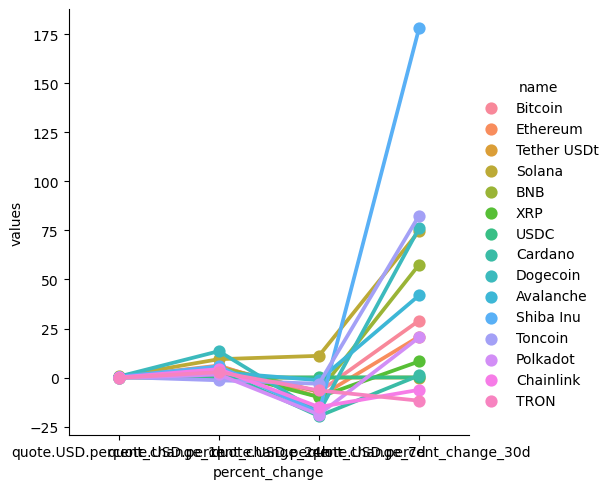

In [59]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [60]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d'],['1hr','24h','7d','30d'])
df7

,name,percent_change,values
0,Bitcoin,1hr,0.17802
1,Bitcoin,24h,5.50736
2,Bitcoin,7d,-7.41391
3,Bitcoin,30d,29.01978
4,Ethereum,1hr,0.25274
5,Ethereum,24h,6.12094
6,Ethereum,7d,-9.95763
7,Ethereum,30d,20.87519
8,Tether USDt,1hr,0.03459
9,Tether USDt,24h,0.05045


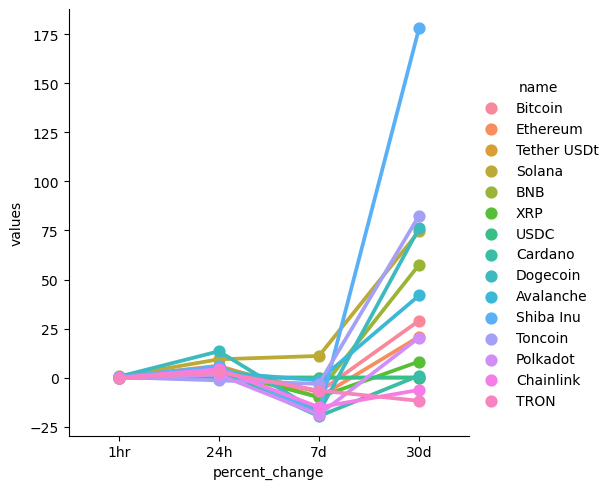

In [61]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [41]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10940,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19660318.00000,19660318.00000,False,NaN,1,NaN,NaN,None,2024-03-21T12:46:00.000Z,67095.14353,55587094621.30833,-12.97280,-0.13128,4.96404,-7.72557,28.55863,60.78567,53.73889,1319111858113.62622,51.87360,1408998014192.14990,None,2024-03-21T12:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-21 14:46:26.849875
1,1027,Ethereum,ETH,ethereum,8619,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120074313.05194,120074313.05194,True,NaN,2,NaN,NaN,None,2024-03-21T12:45:00.000Z,3540.27524,30477889504.00217,-4.11900,0.09694,5.77008,-9.99554,20.47734,43.26872,53.33642,425096117122.06787,16.72200,425096117122.07001,None,2024-03-21T12:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-21 14:46:26.849875
2,825,Tether USDt,USDT,tether,79786,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,103904029582.79608,107792815137.11734,True,NaN,3,NaN,NaN,None,2024-03-21T12:45:00.000Z,1.00061,107385634506.48355,-7.85150,0.05640,0.06824,-0.02347,0.05850,0.12171,0.04600,103967131516.09206,4.08970,107858278767.91000,None,2024-03-21T12:45:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-21 14:46:26.849875
3,5426,Solana,SOL,solana,644,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,443965438.80884,572283114.75251,True,NaN,4,NaN,NaN,None,2024-03-21T12:45:00.000Z,190.46387,7444189668.76823,-16.90510,0.56033,8.75774,11.37032,73.89536,104.11855,102.28607,84559375979.36232,3.32630,108999257232.35001,None,2024-03-21T12:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-21 14:46:26.849875
4,1839,BNB,BNB,bnb,2114,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149537710.73136,149537710.73136,False,NaN,5,NaN,NaN,None,2024-03-21T12:45:00.000Z,560.24092,3018805431.36622,-4.37260,0.34943,4.46423,-7.04896,57.13132,76.03773,108.22826,83777144442.30481,3.29450,83777144442.30000,None,2024-03-21T12:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-21 14:46:26.849875
5,52,XRP,XRP,xrp,1276,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54884241878.00000,99987762348.00000,False,NaN,6,NaN,NaN,None,2024-03-21T12:46:00.000Z,0.61584,2548051835.47708,1.46280,-0.42770,2.90426,-10.00277,7.96402,11.63146,-0.57427,33799945918.63897,1.32810,61584062678.27000,None,2024-03-21T12:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-21 14:46:26.849875
6,3408,USDC,USDC,usd-coin,17566,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,31659110382.53648,31659110382.53648,False,NaN,7,NaN,NaN,None,2024-03-21T12:45:00.000Z,1.00102,11951196276.33909,-3.94400,0.08889,0.06290,0.11274,0.11502,0.09691,0.09237,31691339974.94939,1.24630,31691339974.95000,None,2024-03-21T12:45:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-21 14:46:26.849875
7,2010,Cardano,ADA,cardano,1118,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35569505722.34300,36728716298.96400,False,NaN,8,NaN,NaN,None,2024-03-21T12:45:00.000Z,0.63284,815300286.16233,-12.42560,-0.05230,3.20620,-19.51085,0.68942,22.42166,2.58618,22509688014.03234,0.88450,28477650730.90000,None,2024-03-21T12:45:00.

In [65]:
df10 = df[['name','quote.USD.price','Timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,Timestamp
0,Bitcoin,67095.14353,2024-03-21 14:46:26.849875
0,Bitcoin,67095.14353,2024-03-21 14:46:26.849875
0,Bitcoin,67522.04172,2024-03-21 15:07:28.511584
0,Bitcoin,67425.10127,2024-03-21 15:08:29.447563
0,Bitcoin,67523.04323,2024-03-21 15:09:30.433193


C:\Users\AAF\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AAF\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Timestamp', ylabel='quote.USD.price'>

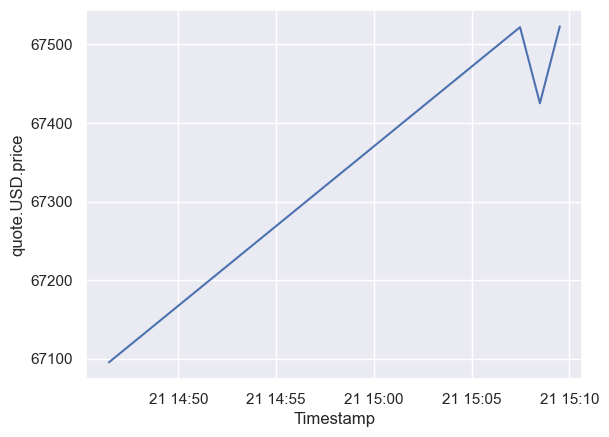

In [68]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='Timestamp', y='quote.USD.price', data = df10)